<a href="https://colab.research.google.com/github/hang-1n-there/pytorch_learn/blob/main/DNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['Target'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
# numpy로 되어있는 데이터(df.values)들을 정규
scaler = StandardScaler()
scaler.fit(df.values[:,:-1])
df.values[:,:-1] = scaler.transform(df.values[:,:-1])

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,11.9


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([506, 14])

In [ ]:
x = data[:,:-1]
y = data[:,-1:]

print(x.shape,y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [ ]:
n_epochs = 100000
learning_rate = 1e-4
print_epochs = 5000

In [ ]:
class Mymodel(nn.Module):
  def __init__(self,input_dim,output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear1 = nn.Linear(input_dim,3)
    self.linear2 = nn.Linear(3,3)
    self.linear3 = nn.Linear(3,output_dim)
    self.act = nn.ReLU()

  def forward(self,x):
    # |h| = (batch_size * 3)
    h = self.act(self.linear1(x))
    h = self.act(self.linear2(h))
    y = self.linear3(h)
    # |y| = (batch_size * 1)

    return y
model = Mymodel(x.size(-1),y.size(-1))


*   nn.Sequential()



In [ ]:
model = nn.Sequential(
    nn.Linear(x.size(-1),3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,y.size(-1))
)

model

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=3, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [ ]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = F.mse_loss(y_hat,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (i+1) % print_epochs == 0:
    print('Epoch : {:d}/{} , Loss : {:.4e}'.format(i+1,n_epochs,loss))

Epoch : 5000/100000 , Loss : 7.4343e+00
Epoch : 10000/100000 , Loss : 7.4327e+00
Epoch : 15000/100000 , Loss : 7.4325e+00
Epoch : 20000/100000 , Loss : 7.4332e+00
Epoch : 25000/100000 , Loss : 7.4244e+00
Epoch : 30000/100000 , Loss : 7.4327e+00
Epoch : 35000/100000 , Loss : 7.4234e+00
Epoch : 40000/100000 , Loss : 7.4227e+00
Epoch : 45000/100000 , Loss : 7.4225e+00
Epoch : 50000/100000 , Loss : 7.4224e+00
Epoch : 55000/100000 , Loss : 7.4223e+00
Epoch : 60000/100000 , Loss : 7.4231e+00
Epoch : 65000/100000 , Loss : 7.4219e+00
Epoch : 70000/100000 , Loss : 7.4215e+00
Epoch : 75000/100000 , Loss : 7.4213e+00
Epoch : 80000/100000 , Loss : 7.4214e+00
Epoch : 85000/100000 , Loss : 7.4212e+00
Epoch : 90000/100000 , Loss : 7.4209e+00
Epoch : 95000/100000 , Loss : 7.4211e+00
Epoch : 100000/100000 , Loss : 7.4203e+00


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


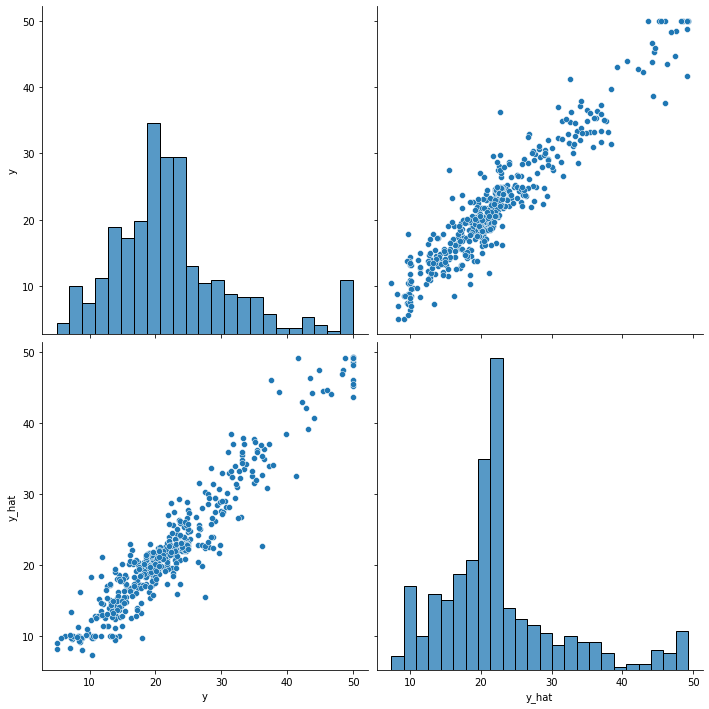

In [ ]:
df = pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(),columns = ['y','y_hat'])
sns.pairplot(df,size=5)
plt.show()